# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Alex\miniconda3\envs\proyecto1\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'E:/alex/disco duro viejo/Desarrollo profesional/Python/DS4B/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}]

### Optimizar los hiper parámetros

####  Con grid search

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,0.07,0.01,0.02,0.00,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.86,0.01,1
3,0.12,0.02,3.05,0.02,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0,-1,none,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.86,0.01,1
19,0.05,0.00,0.00,0.00,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.86,0.01,3
11,0.07,0.01,0.02,0.00,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.86,0.01,3
7,0.07,0.01,0.01,0.01,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.86,0.01,3
17,0.06,0.01,0.00,0.00,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.87,0.86,0.01,6
13,0.07,0.01,0.01,0.01,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.87,0.86,0.01,7
9,0.06,0.01,0.01,0.01,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.87,0.85,0.01,8
18,0.05,0.00,0.01,0.01,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",1,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.84,0.86,0.86,0.85,0.01,9
14,0.04,0.01,0.01,0.01,"LogisticRegression(C=0, n_jobs=-1, penalty='no...",0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0, n_jobs=-...",0.83,0.86,0.86,0.85,0.01,10


## EVALUAR

### Predecir sobre validación

In [8]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [9]:
roc_auc_score(val_y, pred)

0.8599577273669351

### Examinar el mejor modelo

In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0, n_jobs=-1, penalty='none',
                                    solver='saga'))])

In [11]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 4.25650912,  7.35875566,  1.31790439,  1.00149636,  2.10292359,
        -4.53496004,  1.80159322, -0.54255581, -1.75623697, -0.97940283,
        -0.7271794 , -1.34505138,  0.16998038,  0.67570551]])

In [12]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'score_perfil_mms', 'ult_actividad_SMS Sent', 'visitas_total_mms',
       'paginas_vistas_visita_mms', 'ocupacion_Working Professional',
       'ambito_Select', 'ult_actividad_Converted to Lead',
       'ult_actividad_Page Visited on Website', 'ocupacion_Unemployed',
       'ult_actividad_Chat Conversation', 'fuente_Organic Search',
       'descarga_lm_No'], dtype=object)

In [13]:
pd.DataFrame(data = modelo.best_estimator_.named_steps.algoritmo.coef_,
             columns = modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).T.sort_values(0)

,0
paginas_vistas_visita_mms,-4.53
ult_actividad_Converted to Lead,-1.76
ult_actividad_Chat Conversation,-1.35
ult_actividad_Page Visited on Website,-0.98
ocupacion_Unemployed,-0.73
ambito_Select,-0.54
fuente_Organic Search,0.17
descarga_lm_No,0.68
ult_actividad_SMS Sent,1.00
score_perfil_mms,1.32


## REPORTING DEL MODELO

### Gain Chart

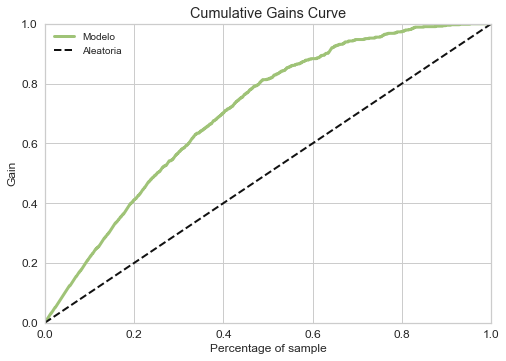

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

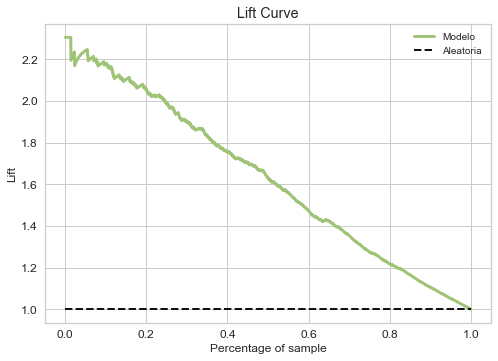

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

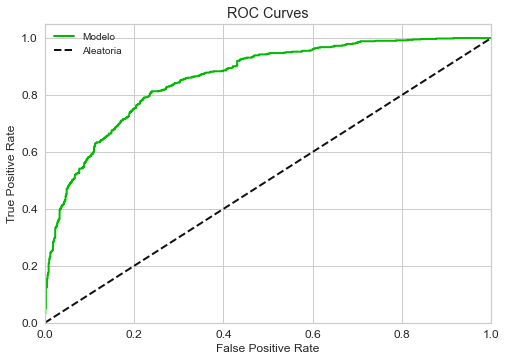

In [16]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);